
Una relación en forma de ley potencial entre dos escalares $x$ e $y$ es aquella que puede expresarse de la forma:

${\displaystyle y=ax^{b}\;\!} $

donde $a$ (la constante de proporcionalidad) y $b$ (el exponente de la potencia) son constantes.

La ley potencial puede interpretarse como una línea recta en un gráfico doble-logarítmico, ya que la ecuación anterior se puede expresar de la forma:

$
{\displaystyle \log(y)=b\log(x)+\log(a)\;\!,}$


El principal interés de las leyes potenciales radica en su invariancia de escala. \\

La invariancia de escala es una propiedad de objetos o leyes en los que no hay cambios si las escalas de tamaños son multiplicadas por un factor.  Muchas de las propiedades de los sistemas biológicos pueden expresarse por medio de estas leyes.

Si miramos la priemra ecuación, una ley de escala puede ser una lineal o una cuadrática para $b = 1$ ó $b=2$.

# ¿Cómo analizar estos datos?
En principio podríamos ajustar los datos por una ley de potencias general y hallar $a$ y $b$. Sin embargo, es útil linearizar los datos antes. Es más sencillo ver los datos como una lineal (no importa el valor de $b$) y ajustar esos datos.

En este notebook en la primera celda ajustamos por una ley de potencias para mostrarles, pero en la práctica lo que se recomienda es la segunda forma. Linearlizamos los datos al tomarle logaritmo y ahí ajustamos por una lineal, obteniendo los coeficientes y sus errores.

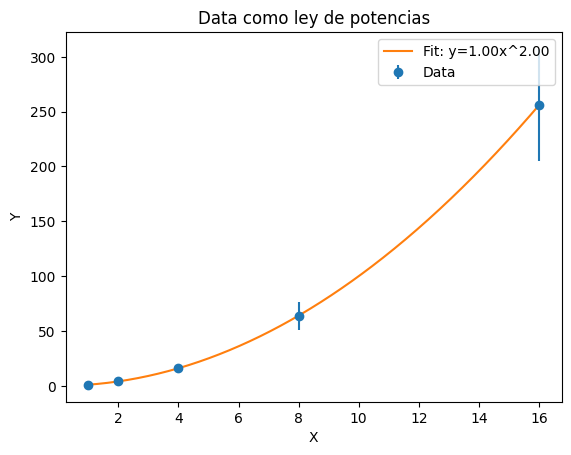

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de prueba
x = np.array([1, 2, 4, 8, 16])
y = np.array([1, 4, 16, 64, 256])

# Error asociado a la variable y (esto es inventado, ustedes ponen los que midieron o calcularon)
y_err = y * 0.2

# Definimos una ley de escala para el ajuste
def power_law(x, a, b):
    return a * x**b

# Hacemos cuadrados mínimos pesados con los errores de y usando curve_fit
popt, pcov = curve_fit(power_law, x, y, sigma=y_err, absolute_sigma=True)
a, b = popt

x_fit = np.linspace(min(x), max(x), 400)

# Graficamos con barras de error
plt.errorbar(x, y, yerr=y_err, fmt='o', label="Data")
plt.plot(x_fit, power_law(x_fit, a, b), label=f"Fit: y={a:.2f}x^{b:.2f}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Data como ley de potencias")
plt.show()


Datos linearizados

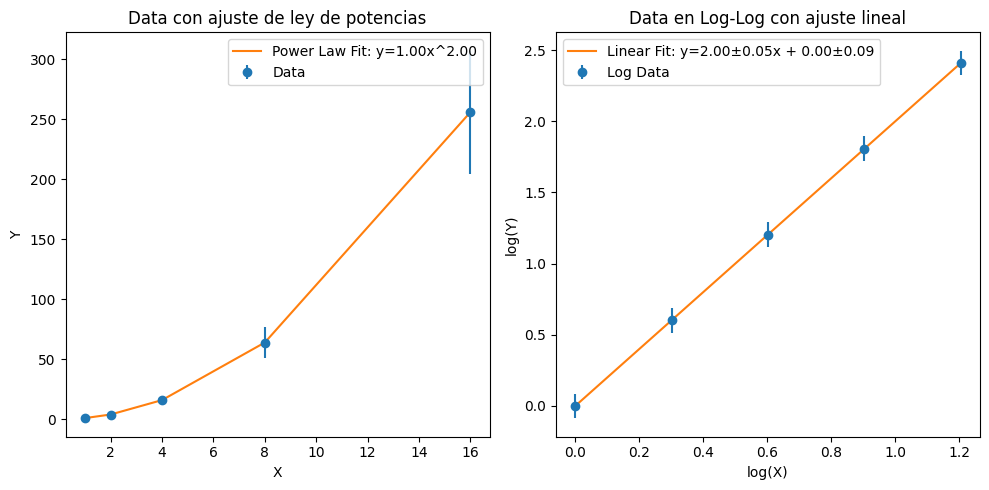

In [ ]:
# Modelo linear con la data en log-log
def linear_model(x, m, c):
    return m * x + c

# Hacemos el logaritmo de los datos
log_x = np.log10(x)
log_y = np.log10(y)
log_y_err = y_err / (y * np.log(10))

# Para que log_y_err no tenga valores negativos, los paso como errores absolutos
popt_linear, pcov_linear = curve_fit(linear_model, log_x, log_y, sigma=log_y_err, absolute_sigma=True)
m, c = popt_linear
m_err, c_err = np.sqrt(np.diag(pcov_linear))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.errorbar(log_x, log_y, yerr=log_y_err, fmt='o', label="Log Data")
plt.plot(log_x, linear_model(log_x, m, c), label=f"Linear Fit: y={m:.2f}±{m_err:.2f}x + {c:.2f}±{c_err:.2f}")
plt.xlabel("log(X)")
plt.ylabel("log(Y)")
plt.legend()
plt.title("Data en Log-Log con ajuste lineal")

plt.subplot(1, 2, 1)
plt.errorbar(x, y, yerr=y_err, fmt='o', label="Data")
plt.plot(x, power_law(x, a, b), label=f"Power Law Fit: y={a:.2f}x^{b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Data con ajuste de ley de potencias")



plt.tight_layout()
plt.show()


In [ ]:
# Es importante analizar los coeficientes junto a sus incertezas asociadas
print(f"Slope (m): {m:.2f} ± {m_err:.2f}")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}")


Slope (m): 2.00 ± 0.05
Intercept (c): 0.00 ± 0.09


Si  desconfian de las funciones empaquetadas, también pueden escribir su propio cuadrados mínimos con las fórmulas que vimos en Métodos!

In [ ]:
def cuadmins(x, y, yerr):
    xi = np.sum(x)
    yi = np.sum(y)
    xi2 = np.sum(x**2)
    xiyi = np.sum(x*y)

    N = len(x)
    D = N*xi2-xi**2

    a1 = (xi2*yi-xi*xiyi)/D
    a2 = (N*xiyi-xi*yi)/D
    cov = (yerr**2)*np.array([[xi2, -xi],[-xi, N]])/D
    return a1, a2, cov